<a href="https://colab.research.google.com/github/AleksandrMac/learning/blob/main/ai/hw/8_task3_%D0%94%D0%BE%D0%BF%D0%BE%D0%BB%D0%BD%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B8_%D0%BF%D0%BE_DataSciense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Задача 3.

Для выполнения работы будет использован csv файл **“shopping_habits”**, содержащий данные о различных покупках, которые совершаются покупателями в разных штатах США. Каждое из наблюдений в файле имеет следующие характеристики:
 - **Customer ID** – порядковый номер строки в таблице
 - **Age** – возраст покупателя
 - **Gender** – пол покупателя
 - **Item Purchased** – приобретенный товар
 - **Category** - категория
 - **Purchase Amount (USD)** – сумма покупки (в долларах)
 - **Location** – локация покупки
 - **Size** – размер (одежды)
 - **Color** – цвет
 - **Season** – время года совершения покупки
 - **Review Rating** – полученный в отзыве рейтинг
 - **Subscription Status** – статус подписки покупателя
 - **Shipping Type** – тип доставки
 - **Discount Applied** – применена ли скидка
 - **Promo Code Used** – применен ли промокод
 - **Previous Purchases** – были ли у данного покупателя предыдущие покупки
 - **Payment Method** – способ оплаты
 - **Frequency of Purchases** – частота покупок.

Задание: **проведи** разведочный анализ данных, **выяви** необычные взаимосвязи между значениями столбцов таблицы, **выполни** визуализацию, **сделай** выводы.

Файл “shopping_habits.csv“ можно скачать по [ссылке](https://drive.google.com/file/d/1Y7L6PQcr8_jblDWNqunh3XLG7YgUViT-/view?usp=sharing)

In [6]:
# Загрузим все необходимые библиотеки
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [17]:
#инициализация dataframe
FILE_ID = '1Y7L6PQcr8_jblDWNqunh3XLG7YgUViT-'  # ID таблицы
url = f'https://drive.google.com/uc?export=download&id={FILE_ID}'

df = pd.read_csv(url)
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

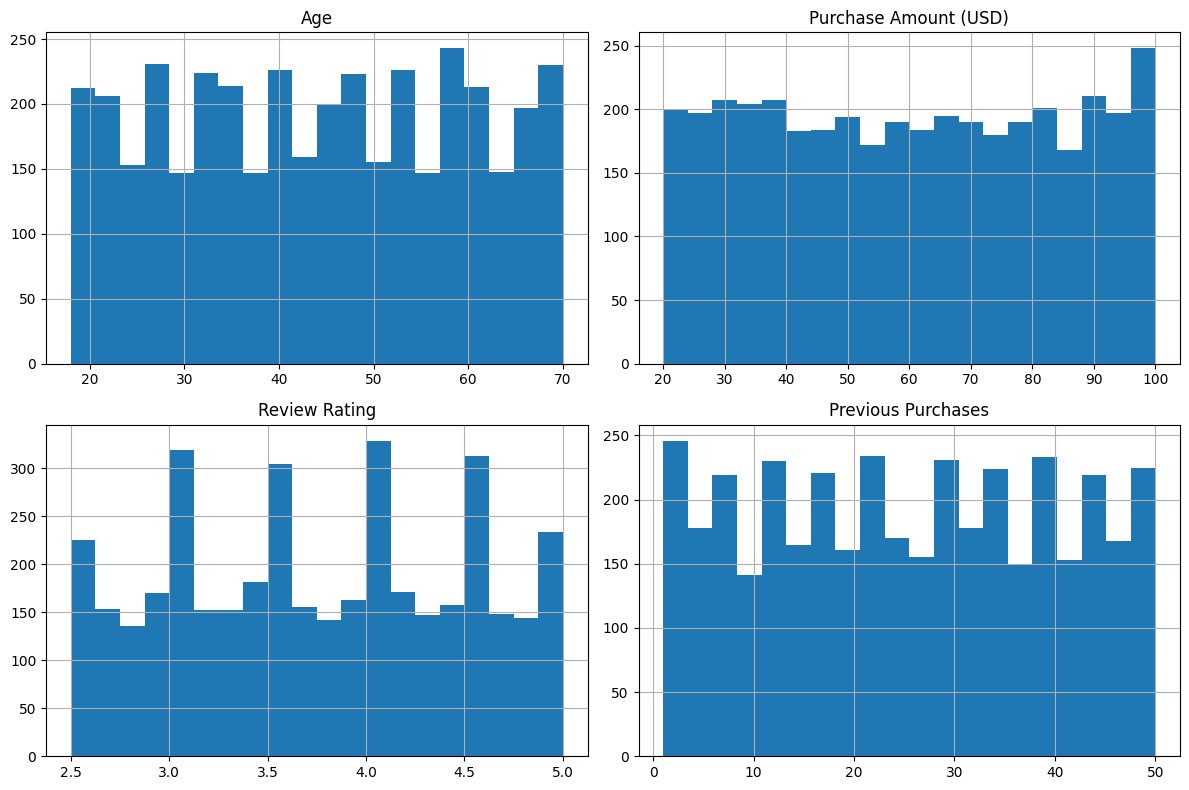

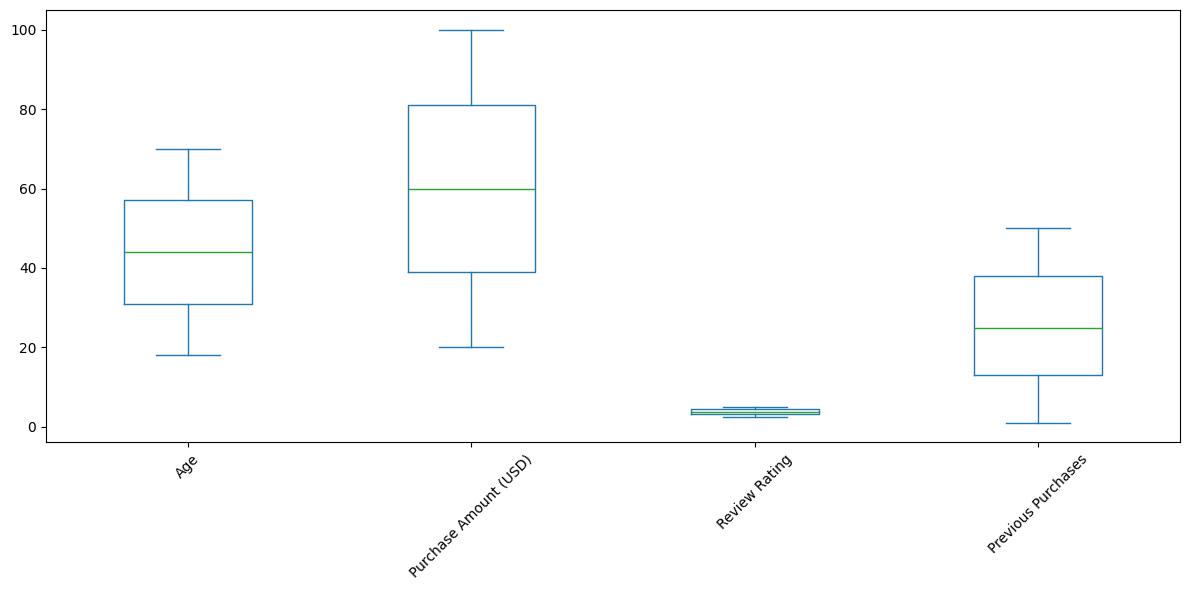

In [10]:
# Гистограммы
df.drop(columns=('Customer ID')).hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Ящики с усами (boxplots)
df.drop(columns=('Customer ID')).select_dtypes(include=[np.number]).plot(kind='box', figsize=(12, 6))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

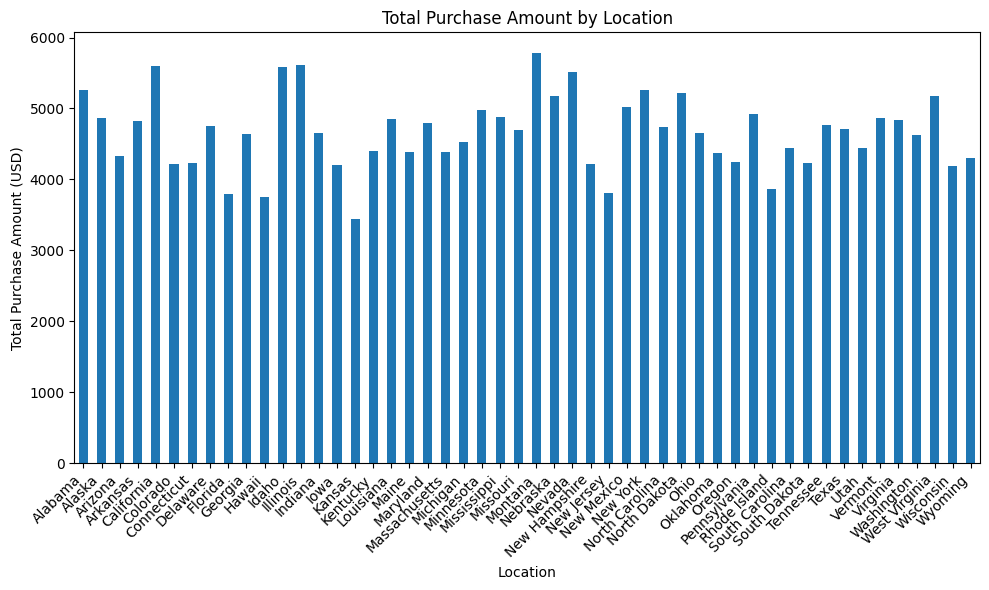

In [15]:
#сумма покупок по регионам
df_pur_by_loc = df[['Location', 'Purchase Amount (USD)']].groupby('Location')['Purchase Amount (USD)'].sum()

plt.figure(figsize=(10, 6))
df_pur_by_loc.plot(kind='bar')
plt.title('Total Purchase Amount by Location')
plt.xlabel('Location')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

из графика видно что во всех локациях сумма покупок более менее одинаковая

In [16]:
df.describe()


,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [21]:
df_promo = df[['Promo Code Used']].groupby('Promo Code Used')['Promo Code Used'].count()
df_promo


,Promo Code Used
Promo Code Used,
No,2223
Yes,1677


In [20]:
df_discount = df[['Discount Applied']].groupby('Discount Applied')['Discount Applied'].count()
df_discount

,Discount Applied
Discount Applied,
No,2223
Yes,1677


In [25]:
dff =  df[df['Discount Applied'] != df['Promo Code Used']]
dff

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases


при анализе полей Promo Code Used и Discount Applied выявлена из 100 процентая кореляция